In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import IPython as ip
%matplotlib inline
ip.core.display.set_matplotlib_formats('png', 'jpeg', quality=90)

### Get nvidia smi data using the following cmdline
```$ nvidia-smi dmon -o T -s pucvmt -c 2000 -f prof_out ```

In [79]:
def read_nvdia_smi_dmon(file_path):
    f = open(file_path)
    lines = f.readlines()
    stop_lines = lines[:2]
    titles = stop_lines[0].strip().strip('#').split()
    print(titles)
    print(stop_lines[1])
    data = [] 
    for line in lines:
        if line in stop_lines:
            continue
        data.append(line.strip().split())
    df = pd.DataFrame(data=data, columns=titles)
    df.to_csv("temp_out")
    df = pd.read_csv("temp_out", index_col=0)
    return df

In [80]:
HtoD = read_nvdia_smi_dmon("prof_out")

['Time', 'gpu', 'pwr', 'gtemp', 'mtemp', 'sm', 'mem', 'enc', 'dec', 'mclk', 'pclk', 'pviol', 'tviol', 'fb', 'bar1', 'rxpci', 'txpci']
#HH:MM:SS    Idx     W     C     C     %     %     %     %   MHz   MHz     %  bool    MB    MB  MB/s  MB/s



In [83]:
COMP = read_nvdia_smi_dmon("prof_out_2")

['Time', 'gpu', 'pwr', 'gtemp', 'mtemp', 'sm', 'mem', 'enc', 'dec', 'mclk', 'pclk', 'pviol', 'tviol', 'fb', 'bar1', 'rxpci', 'txpci']
#HH:MM:SS    Idx     W     C     C     %     %     %     %   MHz   MHz     %  bool    MB    MB  MB/s  MB/s



In [82]:
HtoD[:][HtoD.gpu == 0].describe()

,gpu,pwr,gtemp,mtemp,sm,mem,enc,dec,mclk,pclk,pviol,tviol,fb,bar1,rxpci,txpci
count,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.0,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000
mean,0.0,56.232558,39.468439,37.091362,41.034884,1.651163,0.0,0.0,877.0,920.182724,0.0,0.0,2498.232558,4.790698,2756.365449,3146.093023
std,0.0,13.323284,2.499884,2.276983,36.897264,1.622812,0.0,0.0,0.0,691.128210,0.0,0.0,2224.667208,2.485106,4673.553461,4109.719504
min,0.0,41.000000,36.000000,34.000000,0.000000,0.000000,0.0,0.0,877.0,135.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000
25%,0.0,41.000000,37.000000,34.000000,0.000000,0.000000,0.0,0.0,877.0,135.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000
50%,0.0,68.000000,41.000000,39.000000,66.000000,2.000000,0.0,0.0,877.0,1530.000000,0.0,0.0,4476.000000,7.000000,2.000000,1227.000000
75%,0.0,68.000000,42.000000,39.000000,75.000000,3.000000,0.0,0.0,877.0,1530.000000,0.0,0.0,4476.000000,7.000000,9808.250000,9391.000000
max,0.0,68.000000,42.000000,39.000000,82.000000,4.000000,0.0,0.0,877.0,1530.000000,0.0,0.0,4476.000000,7.000000,10862.000000,9556.000000


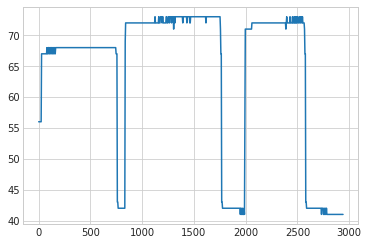

In [84]:
COMP[:][COMP.gpu == 0].pwr.plot(kind="line")

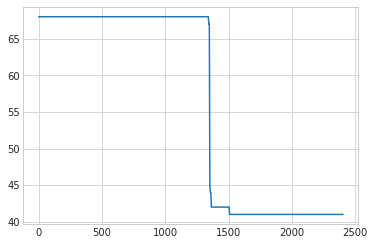

In [68]:
HtoD[:][HtoD.gpu == 0].pwr.plot(kind="line")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


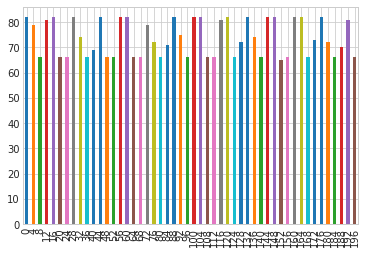

In [78]:
HtoD[:200][HtoD.gpu == 0].sm.plot(kind="bar")

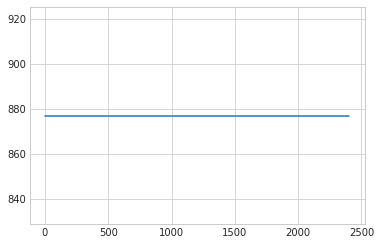

In [73]:
HtoD[:][HtoD.gpu == 0].mclk.plot(kind="line")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


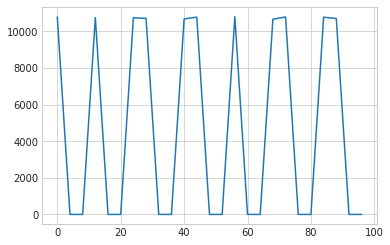

In [65]:
HtoD[:100][HtoD.gpu == 0].rxpci.plot(kind="line")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


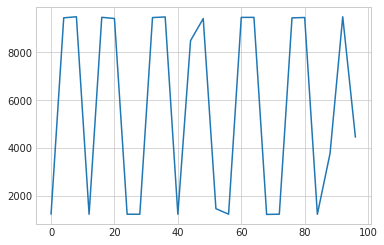

In [66]:
HtoD[:100][HtoD.gpu == 0].txpci.plot(kind="line")

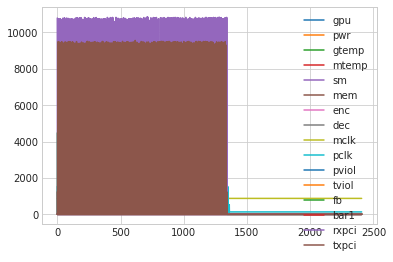

In [43]:
df.plot()

In [29]:
titles

['Time',
 'gpu',
 'pwr',
 'gtemp',
 'mtemp',
 'sm',
 'mem',
 'enc',
 'dec',
 'mclk',
 'pclk',
 'pviol',
 'tviol',
 'fb',
 'bar1',
 'rxpci',
 'txpci']

In [27]:
data

[['13:07:43',
  '0',
  '68',
  '42',
  '39',
  '82',
  '4',
  '0',
  '0',
  '877',
  '1530',
  '0',
  '0',
  '4476',
  '7',
  '10788',
  '1236'],
 ['13:07:43',
  '1',
  '42',
  '34',
  '32',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:43',
  '2',
  '39',
  '33',
  '30',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:43',
  '3',
  '39',
  '36',
  '34',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:44',
  '0',
  '68',
  '42',
  '39',
  '79',
  '4',
  '0',
  '0',
  '877',
  '1530',
  '0',
  '0',
  '4476',
  '7',
  '2',
  '9447'],
 ['13:07:44',
  '1',
  '42',
  '34',
  '32',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:44',
  '2',
  '39',
  '33',
  '30',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:44',
  '3',
  '39',
  '36',
